# Práctica clínica en Medicina Nuclear y Radiofarmacia para Radiofarmacos PET 

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Paquete de tiempo
import datetime

from datetime import time
from datetime import timedelta




### Cargar Datos #### 

### Datos Radiofarmacos PET 2019
#data= pd.read_csv('PET.txt', delim_whitespace =True)
#data = pd.read_csv('fdgdrl.txt', delim_whitespace =True, header=None)
data = pd.read_csv('gapsmadrl.txt', delim_whitespace =True, header=None)
#data = pd.read_csv('gadotadrl.txt', delim_whitespace =True, header=None)
#data = pd.read_csv('galiospetmn.txt', delim_whitespace =True, header=None)

#Datos Fechas Galios 2019-2020
#gadotafecha=pd.read_csv('gadotafecha.txt', delim_whitespace =True)



# create headers list
#### FDG
#headers = ["Genero","Peso","Horarec","Actipres","Horadm","Actidosi","Horadosi","Voldosi","Actiny","Horainy", "Operador"]
#### GAPSMA
headers = ["Genero","Actipres","Horadm","Peso","Actidosi","Horadosi","Actiny","Horainy","Voldosi"]
#### GADOTANOC
#headers = ["Genero","Peso","Actipres","Horadm","Actidosi","Horadosi","Voldosi","Actiny","Horainy"]

data.columns = headers

In [343]:
#para ver los primeros datos
data.head()
#gadotafecha.head()

,Genero,Actipres,Horadm,Peso,Actidosi,Horadosi,Actiny,Horainy,Voldosi
0,M,3.0,8:10,71,3.1,8:08,3.15,8:36,6
1,M,3.0,8:55,75,5.9,8:29,3.31,9:18,5
2,NP,3.0,9:40,71,7.6,8:36,2.86,10:08,6.4
3,M,4.0,12:00,88,4.8,11:55,4.43,12:10,6
4,M,4.0,12:50,77,8.5,12:00,5.26,12:50,7.2


In [344]:
data.describe()

,Actipres,Peso
count,83.000000,83.000000
mean,5.307831,75.638554
std,2.556036,13.681551
min,3.000000,45.000000
25%,4.000000,68.000000
50%,4.000000,75.000000
75%,4.000000,83.000000
max,13.200000,117.000000


In [345]:
#######   INSERTAR FECHAS DE GALIOS

#data['Fecha']=gadotafecha['Fecha']

In [346]:
### Half life PET radionuclides

##############################
########   F- 18  ###########
### half life [min]
HLF= 110
### Lambda
LambdaF= np.log(2)/HLF

##############################
########   Ga- 68  ###########
### half life [min]
HLGa= 67.83
### Lambda
LambdaGa= np.log(2)/HLGa

In [347]:
data.dtypes
#### Cuantos datos por radiofarmaco
#data["Radiofarmaco"].value_counts()

Genero       object
Actipres    float64
Horadm       object
Peso          int64
Actidosi     object
Horadosi     object
Actiny       object
Horainy      object
Voldosi      object
dtype: object

In [348]:
len(data['Genero'])

83

In [349]:
#replace NP to NaN
data.replace("NP", np.nan, inplace = True)

In [350]:
data[["Actidosi"]] = data[["Actidosi"]].astype("float")
data[["Actiny"]] = data[["Actiny"]].astype("float")
data[["Actipres"]] = data[["Actipres"]].astype("float")

In [351]:
data.describe()

,Actipres,Peso,Actidosi,Actiny
count,83.000000,83.000000,81.000000,82.000000
mean,5.307831,75.638554,13.180370,5.377805
std,2.556036,13.681551,17.467602,2.576180
min,3.000000,45.000000,2.800000,2.300000
25%,4.000000,68.000000,4.500000,3.580000
50%,4.000000,75.000000,6.800000,4.460000
75%,4.000000,83.000000,9.800000,6.885000
max,13.200000,117.000000,84.600000,13.510000


In [352]:
import seaborn as sns

# Tiempos en la práctica PET 

## ELAPSED TIME 

In [353]:
#data[['Horadm','Horarec','Horadosi','Horainy']].describe()
data[['Horadm','Horadosi','Horainy']].describe()

,Horadm,Horadosi,Horainy
count,83,81,82
unique,40,70,62
top,8:20,12:25,12:30
freq,9,3,3


Solo 894 datos de hora de recepción de las unidosis de FDG. ¿Cuantas unidosis son recibidas antes de la hora prescrita?

In [146]:
timePR = data.filter(items=['Horadm', 'Horarec','Horainy'])
timePR.dropna(subset=["Horadm","Horarec","Horainy"],axis=0,inplace=True)
timePR.reset_index(drop=True, inplace=True)
#timePR.describe()

In [147]:
prest = pd.to_datetime(timePR["Horadm"],format='%H:%M')
recept = pd.to_datetime(timePR["Horarec"],format='%H:%M')
inyet=pd.to_datetime(timePR["Horainy"],format='%H:%M')

In [148]:
#### Elapsed time
## Si el tiempo es negativo -> La recepción de la unidosis ocurrió antes
#de la hora prescrita

#### Tiempo transcurrido entre la hora de prescripción y la hora de recepción 
PR=recept-prest

In [149]:
#####  FDG

####### Tiempo prescripción y recepción 
listaPR=PR.dt.days<0        
tiempoprecc=PR.dt.seconds
for i in range(len(listaPR)):   
    if listaPR[i]:
        PR[i]=abs(prest[i]-recept[i])
        
tiempoprecc=PR.dt.seconds/60     
        
for i in range(len(listaPR)):   
    if listaPR[i]:
        tiempoprecc[i]= tiempoprecc[i]*(-1) 

In [150]:
timePR['tiempoprecc']=tiempoprecc
tiempoprecc.describe()

count    894.000000
mean     -69.014541
std       78.398077
min     -420.000000
25%     -120.000000
50%      -60.000000
75%       -5.250000
max      158.000000
dtype: float64

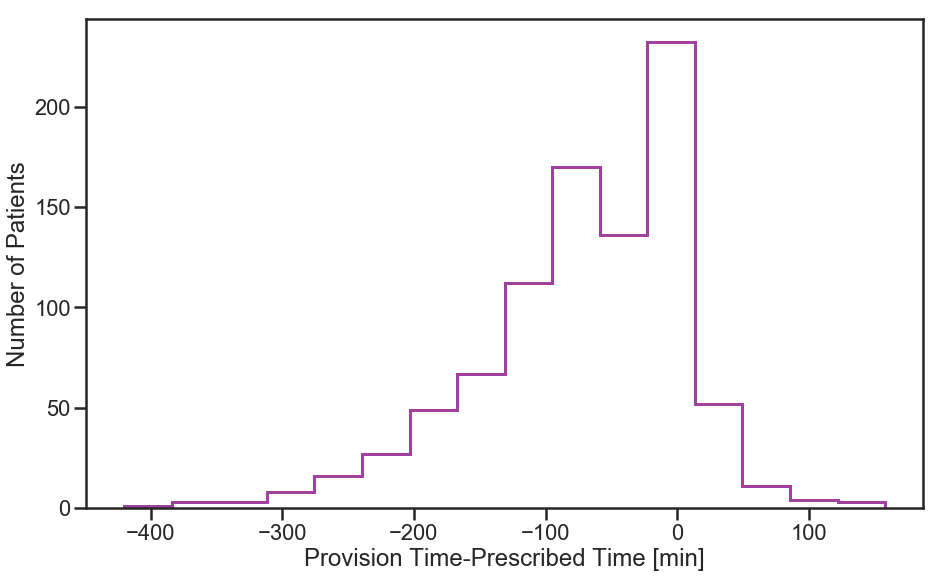

In [151]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(tiempoprecc,bins=16,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 0.75, "color": "purple"})
plt.ylabel('Number of Patients')
#plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Provision Time-Prescribed Time [min]')
#plt.title('FDG')
#plt.title('GA-DOTA')
#plt.title('GA-PSMA')
#plt.savefig('fdgpresrec.pdf',bbox_inches = "tight")

In [152]:
len(timePR[(timePR['tiempoprecc'])>0])

113

In [153]:
np.round((len(timePR[(timePR['tiempoprecc'])>0])*100)/len(timePR['tiempoprecc']),0)

13.0

Remover las unidosis que llegaron despues de la hora prescrita

In [154]:
c=timePR[timePR['tiempoprecc']>0].index.tolist()
len(c)

113

In [155]:
rows = prest.index[[c]]
prest.drop(rows,inplace=True)
inyet.drop(rows,inplace=True)

In [156]:
#Localización y conversión a Not a Number NaN
timePR.loc[(timePR['tiempoprecc'])>0]= np.nan

# simply drop whole row with NaN in "timeID" column
timePR.dropna(subset=["tiempoprecc"], axis=0, inplace=True)

prest.reset_index(drop=True, inplace=True)
inyet.reset_index(drop=True, inplace=True)
timePR.reset_index(drop=True, inplace=True)

In [157]:
timePR.describe()

,tiempoprecc
count,781.000000
mean,-83.025608
std,73.168715
min,-420.000000
25%,-120.000000
50%,-65.000000
75%,-30.000000
max,0.000000


De las 894 unidosis de FDG, 781 fueron recibidas antes de la hora prescrita. Con estas últimas se evalua la diferencia en tiempo entre la hora de inyección y de prescripción

In [158]:
#### Elapsed time
## Si el tiempo es negativo -> La inyección de la unidosis ocurrió antes
#de la hora prescrita

#### Tiempo transcurrido entre la hora de inyección y la hora de prescripción
PIfdg=inyet-prest

In [159]:
#####  FDG

####### Tiempo prescripción y recepción 
listaPIfdg=PIfdg.dt.days<0        
tiempopinyfdg=PIfdg.dt.seconds
for i in range(len(listaPIfdg)):   
    if listaPIfdg[i]:
        PIfdg[i]=abs(inyet[i]-prest[i])
        
tiempopinyfdg=PIfdg.dt.seconds/60     
        
for i in range(len(listaPIfdg)):   
    if listaPIfdg[i]:
        tiempopinyfdg[i]= tiempopinyfdg[i]*(-1) 

In [160]:
timePR['tiempopinyfdg']=tiempopinyfdg
tiempopinyfdg.describe()

count    781.000000
mean      12.299616
std       20.167309
min      -50.000000
25%        0.000000
50%        9.000000
75%       20.000000
max      152.000000
dtype: float64

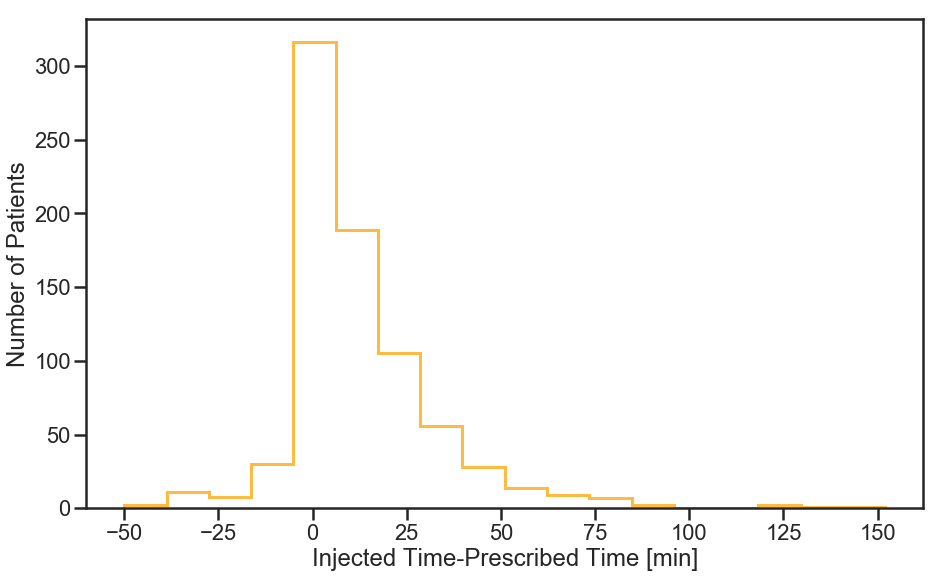

In [161]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(tiempopinyfdg,bins=18,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 0.75, "color": "orange"})
plt.ylabel('Number of Patients')
#plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Injected Time-Prescribed Time [min]')
#plt.title('FDG')
#plt.savefig('fdginypresresto.pdf',bbox_inches = "tight")

In [162]:
len(timePR[(timePR['tiempopinyfdg'])<0])

90

In [163]:
np.round((len(timePR[(timePR['tiempopinyfdg'])<0])*100)/len(timePR['tiempopinyfdg']),0)

12.0

$$FD=e^{-\frac{ln 2}{T_{1/2}}t} $$

In [354]:
###### F-18
## porcentaje de decaimiento por minuto
#(1-np.exp(-LambdaF*1))*100
###### Ga-68
## porcentaje de decaimiento por minuto
(1-np.exp(-LambdaGa*1))*100

1.0166852672697235

In [165]:
### FDG 0.6 %/min
timePR['Error']=(0.6 *(-1)*(tiempopinyfdg))

In [166]:
timePR['Error'].describe()

count    781.000000
mean      -7.379770
std       12.100386
min      -91.200000
25%      -12.000000
50%       -5.400000
75%       -0.000000
max       30.000000
Name: Error, dtype: float64

In [167]:
np.round((len(timePR[(np.absolute(timePR['Error'])<=10.0)])*100)/len(timePR['Error']),0)

68.0

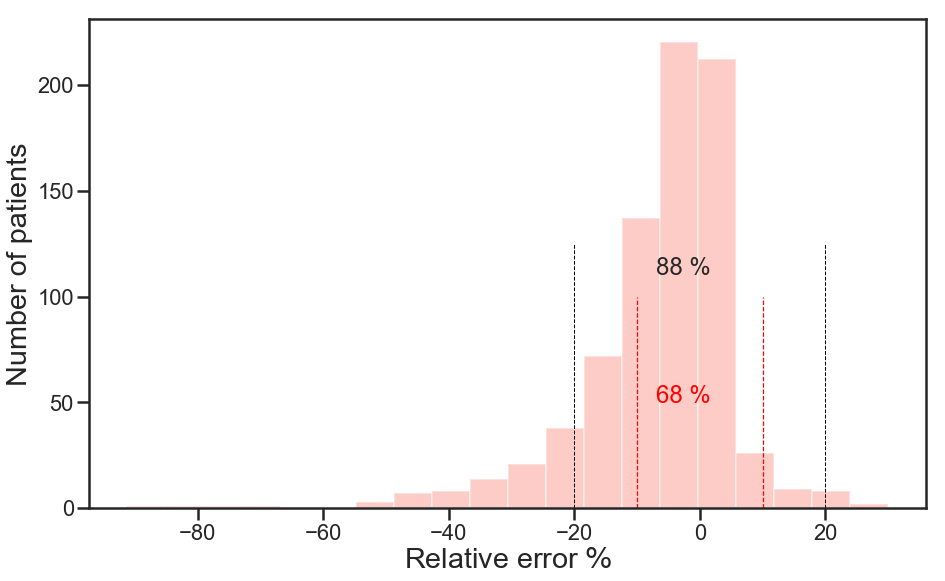

In [168]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(timePR['Error'],bins=20,norm_hist=False,kde=False,color='salmon',label='Actividad Inyectada')
plt.plot((10, 10),(0,100), '--r', linewidth=1.2) 
plt.plot((-10, -10),(0,100), '--r', linewidth=1.2)
plt.text(-7, 50, '68 %',color='red')
plt.plot((20, 20),(0,125), '--k', linewidth=1) 
plt.plot((-20, -20),(0,125), '--k', linewidth=1) 
plt.text(-7, 110, '88 %')
plt.xlabel('Relative error $\%$',fontsize='large')
plt.ylabel('Number of patients',fontsize='large')
#plt.savefig('errorfdgIPresto.pdf',bbox_inches = "tight")

In [169]:
len(timePR[(timePR['Error'])<=-20.0])

86

In [170]:
np.round((len(timePR[(timePR['Error'])<=-20.0])*100)/len(timePR['Error']),0)

11.0

### Test de consistencia

Revisión de la consistencia temporal de eventos en la práctica clínica de administración de radiofarmacos para toma de imagenes de apoyo diagnóstico PET/CT

In [355]:
### Test Consistencia
## No es posible que la hora de inyección ocurra antes de la hora de recepción del bulto
### Hora de recepción y Hora de inyección
### FDG
#timeIR = data.filter(items=['Horainy', 'Horarec'])
#timeIR.dropna(subset=["Horainy","Horarec"],axis=0,inplace=True)
#timeIR.reset_index(drop=True,inplace=True)

## No es posible que la hora de inyección ocurra antes de la hora de dosificación
### Hora de dosificación y Hora de inyección

####### Limpieza de datos con NaN en casilla para test de consistencia
data.dropna(subset=["Horainy","Horadosi"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True,inplace=True)

#data.describe()

In [356]:
inytt = pd.to_datetime(data["Horainy"],format='%H:%M')
dosit = pd.to_datetime(data["Horadosi"],format='%H:%M')

In [357]:
#### Elapsed time
## Si el tiempo es negativo -> Hora de inyección de la unidosis ocurre antes
#de la hora de dosificación

#### Tiempo transcurrido entre la hora de dosificación y la hora de inyección
ID=inytt-dosit

In [358]:
####### Tiempo prescripción y recepción 
listaID=ID.dt.days<0        
tiempoidosi=ID.dt.seconds
for i in range(len(listaID)):   
    if listaID[i]:
        ID[i]=abs(inytt[i]-dosit[i])
        
tiempoidosi=ID.dt.seconds/60     
        
for i in range(len(listaID)):   
    if listaID[i]:
        tiempoidosi[i]= tiempoidosi[i]*(-1) 

In [359]:
data['tiempoidosi']=tiempoidosi
tiempoidosi.describe()

count     80.000000
mean      69.262500
std       96.082605
min     -250.000000
25%       23.000000
50%       45.500000
75%       63.250000
max      381.000000
dtype: float64

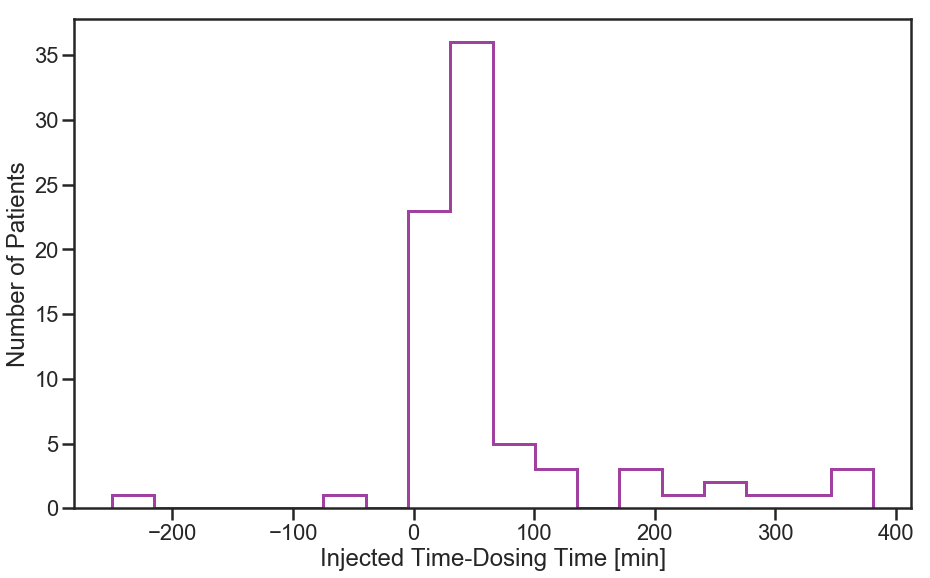

In [360]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(tiempoidosi,bins=18,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 0.75, "color": "purple"})
#sns.distplot(tiempointer,norm_hist=True,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
#"alpha": 1, "color": "b"})
plt.ylabel('Number of Patients')
#plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Injected Time-Dosing Time [min]')
#plt.title('FDG')
#plt.title('GA-DOTA')
#plt.title('GA-PSMA')
plt.savefig('gapsmaconsistencia.pdf',bbox_inches = "tight")

In [361]:
len(data[(data['tiempoidosi'])<0])

2

In [362]:
np.round((len(data[(data['tiempoidosi'])<0])*100)/len(data['tiempoidosi']),0)

2.0

Remover las unidosis inyectadas antes de la dosificación

In [363]:
#i=data[data['tiempoidosi']<0].index.tolist()
#len(i)

In [364]:
#1151-23

In [365]:
#Localización y conversión a Not a Number NaN
data.loc[(data['tiempoidosi'])<0]= np.nan

# simply drop whole row with NaN in "timeID" column
data.dropna(subset=["tiempoidosi"], axis=0, inplace=True)


data.reset_index(drop=True, inplace=True)

In [366]:
data.describe()

,Actipres,Peso,Actidosi,Actiny,tiempoidosi
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,5.356410,75.756410,13.091154,5.401410,74.782051
std,2.615207,13.132873,17.661590,2.602099,89.197963
min,3.000000,47.000000,2.800000,2.500000,5.000000
25%,4.000000,69.000000,4.500000,3.580000,24.000000
50%,4.000000,75.000000,6.400000,4.460000,47.000000
75%,4.000000,82.000000,8.950000,6.717500,63.750000
max,13.200000,117.000000,84.600000,13.510000,381.000000


## Primer metodo: Tiempo de prescripcion respecto a tiempo de inyeccion

In [367]:
inypm = pd.to_datetime(data["Horainy"],format='%H:%M')
prespm = pd.to_datetime(data["Horadm"],format='%H:%M')

In [368]:
#### Elapsed time
## Si el tiempo es negativo -> La inyección de la unidosis ocurrió antes
#de la hora prescrita

#### Tiempo transcurrido entre la hora de prescripción y la hora de inyección 
PIpm=inypm-prespm

In [369]:
####### Tiempo prescripción e inyección 
listaPIpm=PIpm.dt.days<0        
tiempopinypm=PIpm.dt.seconds
for i in range(len(listaPIpm)):   
    if listaPIpm[i]:
        PIpm[i]=abs(inypm[i]-prespm[i])
        
tiempopinypm=PIpm.dt.seconds/60     
        
for i in range(len(listaPIpm)):   
    if listaPIpm[i]:
        tiempopinypm[i]= tiempopinypm[i]*(-1) 

In [370]:
data['tiempopinypm']=tiempopinypm
tiempopinypm.describe()

count     78.000000
mean      18.358974
std       34.522334
min      -20.000000
25%        4.250000
50%       13.500000
75%       25.000000
max      285.000000
dtype: float64

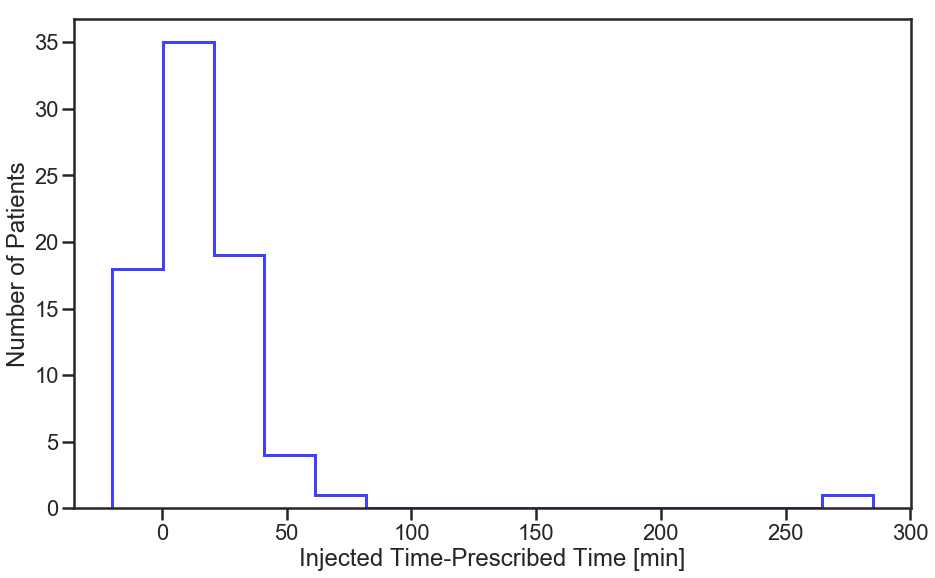

In [372]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(tiempopinypm,bins=15,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 0.75, "color": "b"})
plt.ylabel('Number of Patients')
#plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Injected Time-Prescribed Time [min]')
#plt.title('FDG')
plt.savefig('gapsmainyprespm.pdf',bbox_inches = "tight")

In [389]:
len(data[(data['tiempopinypm'])>0])

60

In [390]:
np.round((len(data[(data['tiempopinypm'])>0])*100)/len(data['tiempopinypm']),0)

77.0

In [375]:
### FDG 0.6 %/min
#data['Error']=(0.6 *(-1)*(tiempopinypm))
### GALIO 1.0 %/min
data['Error']=(1.0 *(-1)*(tiempopinypm))

In [376]:
data['Error'].describe()

count     78.000000
mean     -18.358974
std       34.522334
min     -285.000000
25%      -25.000000
50%      -13.500000
75%       -4.250000
max       20.000000
Name: Error, dtype: float64

In [378]:
np.round((len(data[(np.absolute(data['Error'])<=10.0)])*100)/len(data['Error']),0)

42.0

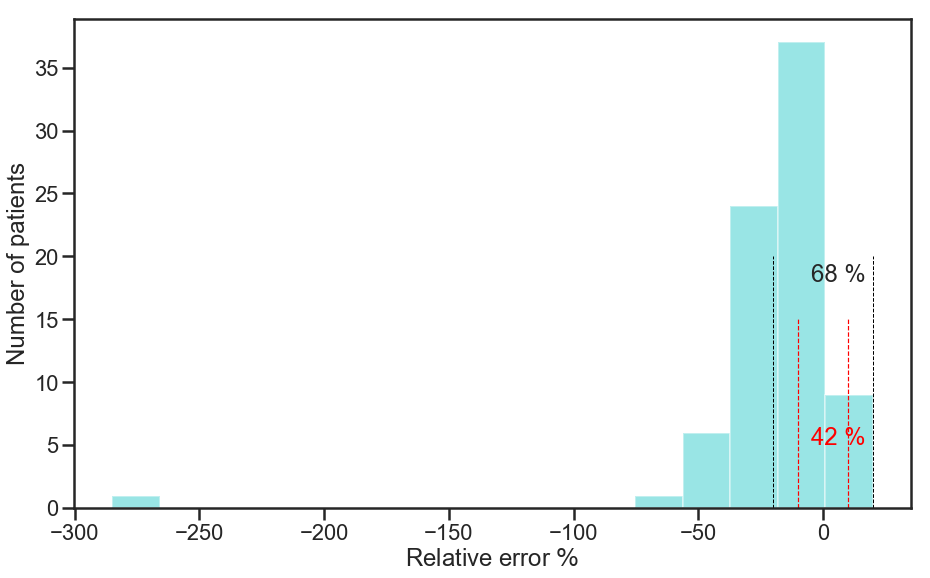

In [379]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(data['Error'],bins=16,norm_hist=False,kde=False,color='c',label='Actividad Inyectada')
plt.plot((10, 10),(0,15), '--r', linewidth=1.2) 
plt.plot((-10, -10),(0,15), '--r', linewidth=1.2)
plt.text(-5, 5, '42 %',color='red')
plt.plot((20, 20),(0,20), '--k', linewidth=1) 
plt.plot((-20, -20),(0,20), '--k', linewidth=1) 
plt.text(-5, 18, '68 %')
plt.xlabel('Relative error $\%$')
plt.ylabel('Number of patients')
plt.savefig('errorgapsmaIPrespm.pdf',bbox_inches = "tight")

In [380]:
len(data[(data['Error'])<=-20.0])

32

In [381]:
np.round((len(data[(data['Error'])<=-20.0])*100)/len(data['Error']),1)

41.0

### Diferencia entre actividad prescrita (corregida por decaimiento) y prescrita

\begin{equation}
\%=\frac{(\text{Actividad prescrita}\times \text{DF}-\text{Actividad Prescrita})\times 100}{\text{Actividad Prescrita}}
\end{equation}

In [382]:
## Decay Factor Correction
### FDG
#DF=np.exp(-LambdaF*data['tiempopinypm'])
### GALIOS
DF=np.exp(-LambdaGa*data['tiempopinypm'])

In [383]:
#### Correcion actividad prescrita a hora de inyeccion 
data['CActpresiny']=data['Actipres']*DF

In [384]:
data["desviaipres"]=((data["CActpresiny"]-data["Actipres"])*100)/data["Actipres"]
data["desviaipres"].describe()

count    78.000000
mean    -14.037175
std      16.617244
min     -94.565394
25%     -22.544933
50%     -12.885073
75%      -4.249133
max      22.676149
Name: desviaipres, dtype: float64

In [393]:
np.round((len(data[(np.absolute(data['desviaipres'])<=10.0)])*100)/len(data['desviaipres']),0)

40.0

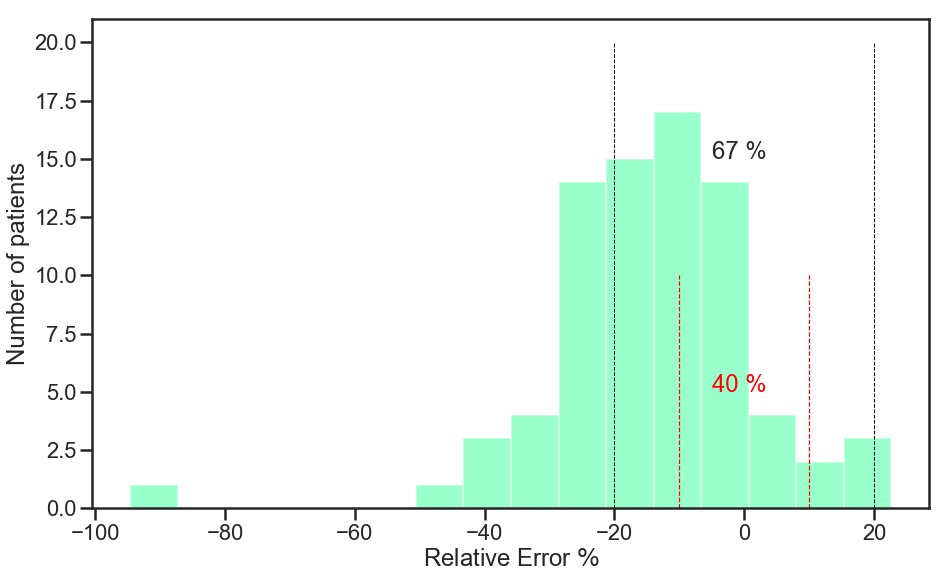

In [394]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(data['desviaipres'],bins=16,norm_hist=False,kde=False,color='springgreen',label='Actividad Inyectada')
plt.plot((10, 10),(0,10), '--r', linewidth=1.2) 
plt.plot((-10, -10),(0,10), '--r', linewidth=1.2)
plt.text(-5, 5, '40 %',color='red')
plt.plot((20, 20),(0,20), '--k', linewidth=1) 
plt.plot((-20, -20),(0,20), '--k', linewidth=1) 
plt.text(-5, 15, '67 %') 
plt.xlabel('Relative Error $\%$')
plt.ylabel('Number of patients')
plt.savefig('errelgapsmainypcor.pdf',bbox_inches = "tight")

In [395]:
len(data[(data['desviaipres'])<=-20.0])

25

In [396]:
np.round((len(data[(data['desviaipres'])<=-20.0])*100)/len(data['desviaipres']),1)

32.100000000000001

### Diferencia entre actividad dosificada (corregida por decaimiento) y prescrita

\begin{equation}
\%=\frac{(\text{Actividad dosificada}\times \text{FD}-\text{Actividad Prescrita})\times 100}{\text{Actividad Prescrita}}
\end{equation}

In [397]:
## Decay Factor Correction
### FDG
#FD=np.exp(-LambdaF*data['tiempoidosi'])
### GALIOS
FD=np.exp(-LambdaGa*data['tiempoidosi'])

In [398]:
#### Correcion actividad dosificada a hora de inyeccion 
data['CActdosiny']=data['Actidosi']*FD

In [399]:
data["desviaidosi"]=((data["CActdosiny"]-data["Actipres"])*100)/data["Actipres"]
data["desviaidosi"].describe()

count    78.000000
mean    -15.170359
std      30.875558
min     -95.299974
25%     -33.569520
50%     -14.083041
75%       6.729500
max      36.591308
Name: desviaidosi, dtype: float64

In [400]:
np.round((len(data[(np.absolute(data['desviaidosi'])<=20.0)])*100)/len(data['desviaidosi']),0)

47.0

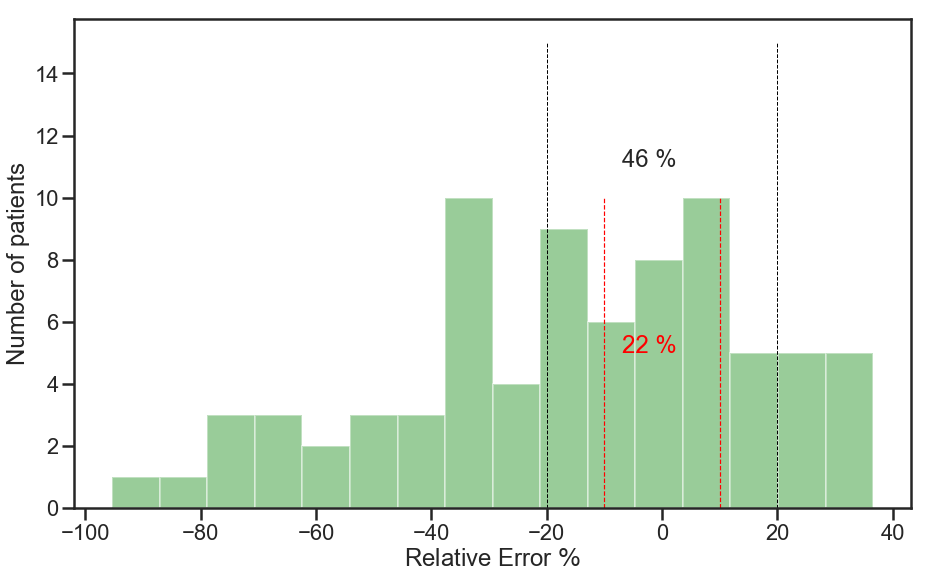

In [401]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(data['desviaidosi'],bins=16,norm_hist=False,kde=False,color='green',label='Actividad Inyectada')
plt.plot((10, 10),(0,10), '--r', linewidth=1.2) 
plt.plot((-10, -10),(0,10), '--r', linewidth=1.2)
plt.text(-7, 5, '22 %',color='red')
plt.plot((20, 20),(0,15), '--k', linewidth=1) 
plt.plot((-20, -20),(0,15), '--k', linewidth=1) 
plt.text(-7, 11, '46 %')
plt.xlabel('Relative Error $\%$')
plt.ylabel('Number of patients')
plt.savefig('errelgapsmainydosicor.pdf',bbox_inches = "tight")

In [402]:
len(data[(data['desviaidosi'])<=-20.0])

31

In [403]:
np.round((len(data[(data['desviaidosi'])<=-20.0])*100)/len(data['desviaidosi']),0)

40.0

### DRL 

In [406]:
data.dropna(subset=["Actiny"], axis=0, inplace=True)
data.dropna(subset=["Actipres"], axis=0, inplace=True)
#data.dropna(subset=["Fecha"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)
data['Actiny'].describe()

count    78.000000
mean      5.401410
std       2.602099
min       2.500000
25%       3.580000
50%       4.460000
75%       6.717500
max      13.510000
Name: Actiny, dtype: float64

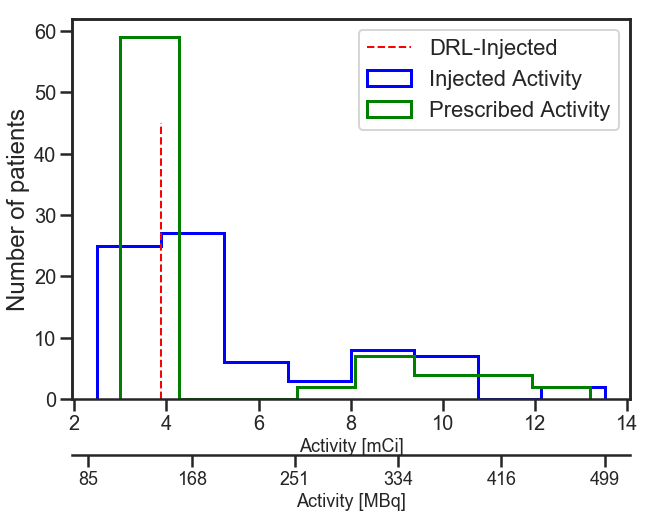

In [405]:
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data['Actiny'],norm_hist=False,kde=False,ax=ax1,label='Injected Activity',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "b"})
sns.distplot(data['Actipres'],norm_hist=False,kde=False,ax=ax1, label='Prescribed Activity',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "g"})

################################ 
#########  FDG  ################
#plt.plot((20, 20),(0,140), '--k', linewidth=1) 
#plt.plot((4, 4),(0,140), '--k', linewidth=1) 
#plt.plot((9.0, 9.0),(0,140), '--r', linewidth=2,label='DRL-Injected')


################################ 
#########  GAPSMA  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
#plt.plot((4.46, 4.46),(0,60), '--r', linewidth=2,label='DRL-Injected')

################################ 
#########  GADOTANOC  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
plt.plot((3.88, 3.88),(0,45), '--r', linewidth=2,label='DRL-Injected')


#ax1.set_title('$^{18}$F-FDG',fontsize=14)
#ax1.set_title('$^{68}$Ga-PSMA',fontsize=14)
#ax1.set_title('$^{68}$Ga-DOTA',fontsize=14)
ax1.set_ylabel('Number of patients')
ax1.set_xlabel('Activity [mCi]',fontsize=18)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(loc='upper right')
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data['Actiny'].min(),data['Actiny'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Activity [MBq]',fontsize=18)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=18)


plt.savefig('gapsmadrl.pdf',bbox_inches = "tight")

## Calculos 

### Diferencia entre actividad prescrita e inyectada 

\begin{equation}
\%=\frac{(\text{Actividad Inyectada}-\text{Actividad Prescrita})\times 100}{\text{Actividad Prescrita}}
\end{equation}

In [407]:
##### Error relativo porcentual entre actividad inyectada y prescrita
data["desviasigno"]=((data["Actiny"]-data["Actipres"])*100)/data["Actipres"]
data["desviasigno"].describe()

count     78.000000
mean       2.488728
std       24.657034
min      -37.500000
25%      -11.882883
50%        0.378788
75%       12.562500
max      142.500000
Name: desviasigno, dtype: float64

In [408]:
np.round((len(data[(np.absolute(data['desviasigno'])<=10.0)])*100)/len(data['desviasigno']),0)

37.0

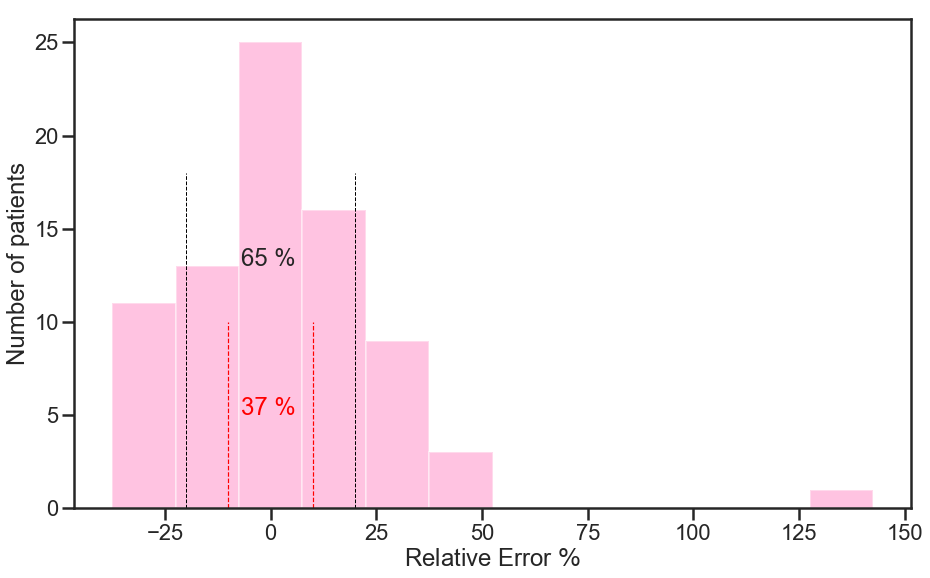

In [412]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.distplot(data['desviasigno'],bins=12,norm_hist=False,kde=False,color='hotpink',label='Actividad Inyectada')
plt.plot((10, 10),(0,10), '--r', linewidth=1.2) 
plt.plot((-10, -10),(0,10), '--r', linewidth=1.2)
plt.text(-7, 5, '37 %',color='red')
plt.plot((20, 20),(0,18), '--k', linewidth=1) 
plt.plot((-20, -20),(0,18), '--k', linewidth=1) 
plt.text(-7, 13, '65 %')
plt.xlabel('Relative Error $\%$')
plt.ylabel('Number of patients')
plt.savefig('errelgapsmadesviasigno.pdf',bbox_inches = "tight")

In [413]:
len(data[(data['desviasigno'])<-20.0])

13

In [414]:
np.round((len(data[(data['desviasigno'])<-20.0])*100)/len(data['desviasigno']),0)

17.0

# Segundo Método: Actividad residual en jeringa post inyección

In [415]:
residual = pd.read_csv('remanente.txt', delim_whitespace =True)

residual.head()

,RN,Actpre,Actpost
0,FDG,6.98,0.15
1,FDG,9.37,0.36
2,FDG,13.78,0.39
3,FDG,9.71,0.44
4,FDG,11.42,0.30


In [416]:
residual['Actiny']=residual['Actpre']-residual['Actpost']

In [417]:
residual['Porcentaje']=(residual['Actpost']*100)/residual['Actpre']

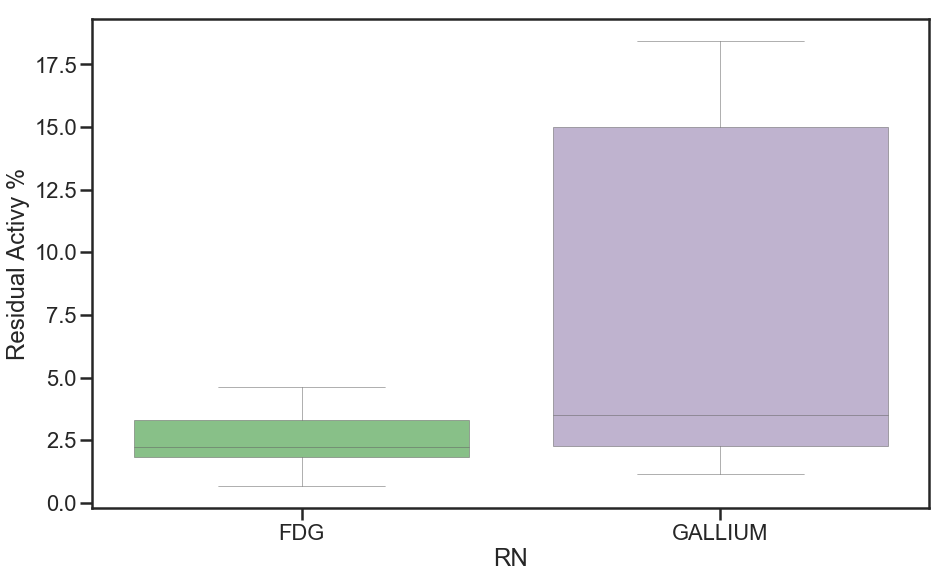

In [418]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.boxplot(x="RN", y="Porcentaje", data=residual,
              linewidth = 0.5,
              palette='Accent',
              fliersize=2)
#plt.setp(h.artists, edgecolor = 'darkgray')
#plt.setp(h.lines, color='darkgray')
plt.ylabel('Residual Activy %')
#plt.xlabel("Radionuc")
#plt.xticks(rotation=90)
plt.savefig('residual.pdf',bbox_inches = "tight")

In [419]:
residual[residual['RN']=='FDG'].describe()

,Actpre,Actpost,Actiny,Porcentaje
count,14.000000,14.000000,14.000000,14.000000
mean,10.537857,0.256143,10.281714,2.495151
std,2.273091,0.125702,2.245969,1.249779
min,6.890000,0.064000,6.570000,0.673684
25%,9.402500,0.180500,9.075000,1.842214
50%,10.860000,0.215000,10.645000,2.215275
75%,11.480000,0.350000,11.333000,3.293754
max,13.790000,0.470000,13.612000,4.644412


In [420]:
residual[residual['RN']=='GALLIUM'].describe()

,Actpre,Actpost,Actiny,Porcentaje
count,7.000000,7.000000,7.000000,7.000000
mean,3.862857,0.318571,3.544286,8.227057
std,0.393138,0.297514,0.475425,7.544378
min,3.130000,0.050000,3.020000,1.146789
25%,3.725000,0.080000,3.250000,2.253592
50%,4.000000,0.120000,3.400000,3.514377
75%,4.050000,0.600000,3.790000,15.000000
max,4.360000,0.700000,4.310000,18.421053


In [15]:
#timeIR.describe()
#timeID.describe()

,Horainy,Horarec
count,895,895
unique,326,96
top,12:30,7:30
freq,18,78


In [28]:
##### HORAS EN FORMATO DE 24 H 
##### MINUTOS EN FORMATO DE 60 

###  FDG
###### Hora de recepción consistencia
#recc = pd.to_datetime(timeIR["Horarec"],format='%H:%M')
###### Hora de inyección cosistencia 
#inyc = pd.to_datetime(timeIR["Horainy"],format='%H:%M')

### GALIOS
##### Hora de inyección-test ########
#inyt = pd.to_datetime(timeID["Horainy"],format='%H:%M')

##### Hora de dosificación-test ########
#dosit = pd.to_datetime(timeID["Horadosi"],format='%H:%M')

In [ ]:
##### Hora de inyección-test ########
inyt = pd.to_datetime(timeID["Horainy"],format='%H:%M')

##### Hora de dosificación-test ########
dosit = pd.to_datetime(timeID["Horadosi"],format='%H:%M')

In [21]:
#### Elapsed time
## Si el tiempo es negativo -> Se realizo la recepción y dosificación despues de inyectar
## Lo cual no tiene sentido

#### Tiempo transcurrido entre la hora de inyección y la hora de recepción 
IR=inyc-recc

#### Tiempo transcurrido entre la hora de inyección y la hora de dosificación
ID=inyt-dosit

In [22]:
#####  FDG

####### Tiempo inyección y recepción 
listaIR=IR.dt.days<0        
tiempoirecc=IR.dt.seconds
for i in range(len(listaIR)):   
    if listaIR[i]:
        IR[i]=abs(inyc[i]-recc[i])
        
tiempoirecc=IR.dt.seconds/60     
        
for i in range(len(listaIR)):   
    if listaIR[i]:
        tiempoirecc[i]= tiempoirecc[i]*(-1) 

In [23]:
#### GALIOS

####### Tiempo inyección y dosificación  
listaID=ID.dt.days<0        
tiempoidosi=ID.dt.seconds
for i in range(len(listaID)):   
    if listaID[i]:
        ID[i]=abs(inyt[i]-dosit[i])
        
tiempoidosi=ID.dt.seconds/60     
        
for i in range(len(listaID)):   
    if listaID[i]:
        tiempoidosi[i]= tiempoidosi[i]*(-1) 

In [24]:
#tiempoirecc.describe()
tiempoidosi.describe()

count    1151.000000
mean      128.124240
std        89.475035
min      -288.000000
25%        68.000000
50%       123.000000
75%       186.500000
max       444.000000
dtype: float64

Text(0.5,1,'FDG')

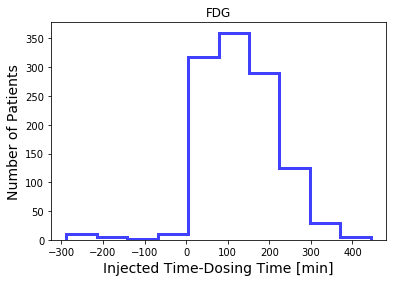

In [25]:
sns.distplot(tiempoidosi,bins=10,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 0.75, "color": "b"})
#sns.distplot(tiempointer,norm_hist=True,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
#"alpha": 1, "color": "b"})
plt.ylabel('Number of Patients',fontsize=14)
#plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Injected Time-Dosing Time [min]',fontsize=14)
#plt.xlabel('Injected Time-Provision Time [min]',fontsize=14)
plt.title('FDG')
#plt.title('GA-DOTA')
#plt.title('GA-PSMA')
#plt.savefig('fdginyrec.pdf',bbox_inches = "tight")

In [354]:
#timeIR['tiempoirecc']=tiempoirecc
timeID['tiempoidosi']=tiempoidosi

In [355]:
#len(timeIR[(timeIR['tiempoirecc'])<0])
len(timeID[(timeID['tiempoidosi'])>0])

125

In [356]:
#### Para ver datos sospechosos
#timeID[(timeID['tiempoidosi'])<0]

In [357]:
#Localización y conversión a Not a Number NaN
timeID.loc[(timeID['tiempoidosi'])<0]= np.nan

# simply drop whole row with NaN in "timeID" column
timeID.dropna(subset=["tiempoidosi"], axis=0, inplace=True)

In [358]:
## Decay Factor Correction
### FDG
#DF=np.exp(-LambdaF*timeID['tiempoidosi'])
### GALIOS
DF=np.exp(-LambdaGa*timeID['tiempoidosi'])

In [359]:
#### Correcion actividad dosificada a hora de inyeccion 
timeID['CActdosiny']=timeID['Actidosi']*DF

In [360]:
timeID.dtypes

Horainy         object
Horadosi        object
Actidosi       float64
Actipres       float64
tiempoidosi    float64
CActdosiny     float64
dtype: object

In [361]:
timeID["desviasigno"]=((timeID["CActdosiny"]-timeID["Actipres"])*100)/timeID["Actipres"]

In [362]:
timeID["desviasigno"].describe()

count    125.000000
mean     -10.833770
std       29.855620
min      -66.125792
25%      -31.009874
50%      -14.668736
75%        2.765168
max       93.493018
Name: desviasigno, dtype: float64

Text(0,0.5,'Proportion of patients')

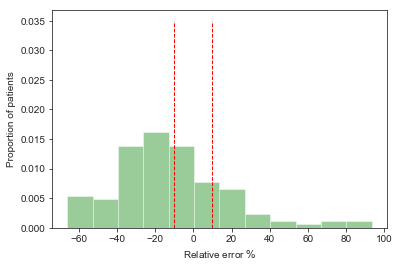

In [363]:
sns.distplot(timeID['desviasigno'],norm_hist=True,kde=False,color='g',label='Actividad Inyectada')
plt.plot((10, 10),(0,0.035), '--r', linewidth=1) 
plt.plot((-10, -10),(0,0.035), '--r', linewidth=1) 
plt.xlabel('Relative error $\%$')
plt.ylabel('Proportion of patients')
#plt.savefig('errorrelfdgID.pdf',bbox_inches = "tight")

## Primer metodo: Tiempo de prescripcion respecto a tiempo de inyeccion

In [364]:
### Hora de Prescripción y Hora de recepción
#timePR = data.filter(items=['Horadm', 'Horarec'])
### Hora de Prescripción y Hora de inyección
timePI=data.filter(items=['Horadm', 'Horainy','Actipres'])
### Hora de Prescripción y Hora de dosificación
timePD=data.filter(items=['Horadm', 'Horadosi'])

In [365]:
### Prescripción y Recepción
#timePR.dropna(subset=["Horadm","Horarec"], axis=0, inplace=True)
### Prescripción e Inyección
timePI.dropna(subset=["Horadm","Horainy","Actipres"], axis=0, inplace=True)
### Prescripción y Dosificación
timePD.dropna(subset=["Horadm","Horadosi"], axis=0, inplace=True)

# reset index, because we droped rows
#timePR.reset_index(drop=True, inplace=True)
timePI.reset_index(drop=True, inplace=True)
timePD.reset_index(drop=True, inplace=True)

In [366]:
#timePR.describe()
#timePI.describe()
#timePD.describe()
#timeID


In [367]:
##### HORAS EN FORMATO DE 24 H 
##### MINUTOS EN FORMATO DE 60 

#############################################################
##### Hora para la que esta "calibrada la actividad" ########
#presPR = pd.to_datetime(timePR["Horadm"],format='%H:%M')
presI = pd.to_datetime(timePI["Horadm"],format='%H:%M')
presD = pd.to_datetime(timePD["Horadm"],format='%H:%M')

############################################################
##### Hora de recepción del bulto en MN ########
#rec = pd.to_datetime(timePR["Horarec"],format='%H:%M')


############################################################
##### Hora de inyección ########
iny = pd.to_datetime(timePI["Horainy"],format='%H:%M')

############################################################
##### Hora de dosificación ########
dosi = pd.to_datetime(timePD["Horadosi"],format='%H:%M')

In [368]:
#### Elapsed time

#### Tiempo transcurrido entre la hora prescrita y la hora de recepción 
#PR=presPR-rec

#### Tiempo transcurrido entre la hora prescrita y la hora de inyección 
PI=presI-iny

#### Tiempo transcurrido entre la hora prescrita y la hora de dosificación
PD=presD-dosi

#subgroup=pd.DataFrame(data=timePR)
#headers = ["timePR"]
#subgroup.columns = headers
#subgroup



In [214]:
#PI
#PR
#PD

In [276]:
### FDG
####### Tiempo prescripción y recepción
listaPR=PR.dt.days<0
tiempointer=PR.dt.seconds

for i in range(len(listaPR)):   
    if listaPR[i]:
        PR[i]=abs(presPR[i]-rec[i])

tiempointer=PR.dt.seconds/60     
        
for i in range(len(listaPR)):   
    if listaPR[i]:
        tiempointer[i]= tiempointer[i]*(-1) 
        

In [369]:

####### Tiempo prescripción e inyección       
listaPI=PI.dt.days<0        
tiempopiny=PI.dt.seconds
for i in range(len(listaPI)):   
    if listaPI[i]:
        PI[i]=abs(presI[i]-iny[i])
        
tiempopiny=PI.dt.seconds/60     
        
for i in range(len(listaPI)):   
    if listaPI[i]:
        tiempopiny[i]= tiempopiny[i]*(-1) 
        
####### Tiempo prescripción y dosificación       
listaPD=PD.dt.days<0        
tiempopdosi=PD.dt.seconds
for i in range(len(listaPD)):   
    if listaPD[i]:
        PD[i]=abs(presD[i]-dosi[i])
        
tiempopdosi=PD.dt.seconds/60     
        
for i in range(len(listaPD)):   
    if listaPD[i]:
        tiempopdosi[i]= tiempopdosi[i]*(-1)        

In [333]:
#tiempopdosi
#tiempointer
#tiempopiny

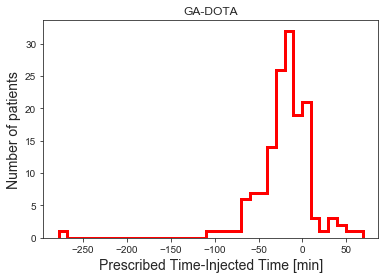

In [371]:
sns.distplot(tiempopiny,norm_hist=False,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "r"})
#sns.distplot(tiempointer,norm_hist=True,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
#"alpha": 1, "color": "b"})
plt.ylabel('Number of patients',fontsize=14)
plt.xlabel('Prescribed Time-Injected Time [min]',fontsize=14)

#plt.title('FDG')
plt.title('GA-DOTA')
#plt.title('GA-PSMA')
plt.savefig('gadotaTpresiny.pdf',bbox_inches = "tight")

In [217]:
#tiempointer.describe()
tiempopiny.describe()
#tiempopdosi.describe()

count    148.000000
mean     -21.155405
std       33.561744
min     -278.000000
25%      -32.500000
50%      -20.000000
75%       -5.750000
max       69.000000
dtype: float64

In [281]:
timePI['tiempopiny']=tiempopiny

In [282]:
## Decay Factor Correction
### FDG
DFPI=np.exp(-LambdaF*timePI['tiempopiny'])
### GALIOS
#DFPI=np.exp(-LambdaGa*timePI['tiempopiny'])

In [283]:
#### Correcion actividad dosificada a hora de inyeccion 
timePI['CActpres']=timePI['Actipres']*DFPI

In [284]:
timePI.dtypes

Horadm         object
Horainy        object
Actipres      float64
tiempopiny    float64
CActpres      float64
dtype: object

In [285]:
timePI["desviasigno"]=((timePI["CActpres"]-timePI["Actipres"])*100)/timePI["Actipres"]

In [286]:
timePI["desviasigno"].describe()

count    1162.000000
mean       11.052704
std        31.259451
min       -27.939892
25%         0.000000
50%         5.835101
75%        13.431252
max       824.767636
Name: desviasigno, dtype: float64

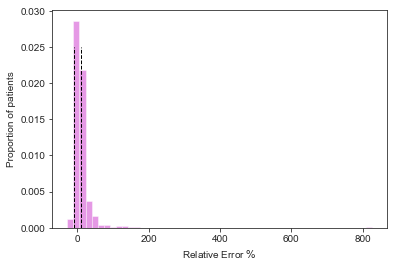

In [287]:
sns.distplot(timePI['desviasigno'],norm_hist=True,kde=False,color='m',label='Actividad Inyectada')
plt.plot((10, 10),(0,0.025), '--k', linewidth=1) 
plt.plot((-10, -10),(0,0.025), '--k', linewidth=1) 
plt.xlabel('Relative Error $\%$')
plt.ylabel('Proportion of patients')
plt.savefig('errorrelfdgPI.pdf',bbox_inches = "tight")

### Desviación de Actividad Inyectada

In [288]:
data[["Actiny"]] = data[["Actiny"]].astype("float")
data[["Actipres"]] = data[["Actipres"]].astype("float")
data[["Actidosi"]] = data[["Actidosi"]].astype("float")
#data[["Voldosi"]] = data[["Voldosi"]].astype("float")
data.dtypes

Genero       object
Peso         object
Horarec      object
Actipres    float64
Horadm       object
Actidosi    float64
Horadosi     object
Voldosi      object
Actiny      float64
Horainy      object
Operador     object
dtype: object

In [289]:
data["desviasigno"]=((data["Actiny"]-data["Actipres"])*100)/data["Actipres"]

In [290]:
### Error relativo porcentual entre Actividad prescrita y actividad inyectada 
data["desvia"]=np.absolute(((data["Actiny"]-data["Actipres"])*100)/data["Actipres"])

In [291]:
data["desviasigno"].describe()

count    1180.000000
mean       -6.287146
std        11.893597
min       -51.041667
25%       -12.796349
50%        -6.045009
75%         0.000000
max        76.666667
Name: desviasigno, dtype: float64

In [292]:
c

406

In [293]:
len(data[(np.absolute(data['desviasigno'])<=20.0)])

1029

In [294]:
data['desviasigno'].std()

11.89359727659694

In [295]:
data.dropna(subset=["Actiny"], axis=0, inplace=True)
data.dropna(subset=["Actipres"], axis=0, inplace=True)
#data.dropna(subset=["Fecha"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [296]:
data.describe()

,Actipres,Actidosi,Actiny,desviasigno,desvia
count,1180.000000,1174.000000,1180.000000,1180.000000,1180.000000
mean,9.619042,23.954046,8.965212,-6.287146,10.007287
std,2.237227,13.954673,2.195841,11.893597,8.988251
min,2.400000,1.400000,2.020000,-51.041667,0.000000
25%,8.300000,14.225000,7.500000,-12.796349,3.358086
50%,9.600000,20.200000,9.000000,-6.045009,8.007937
75%,11.100000,30.275000,10.442500,0.000000,14.285714
max,15.000000,99.100000,19.300000,76.666667,76.666667


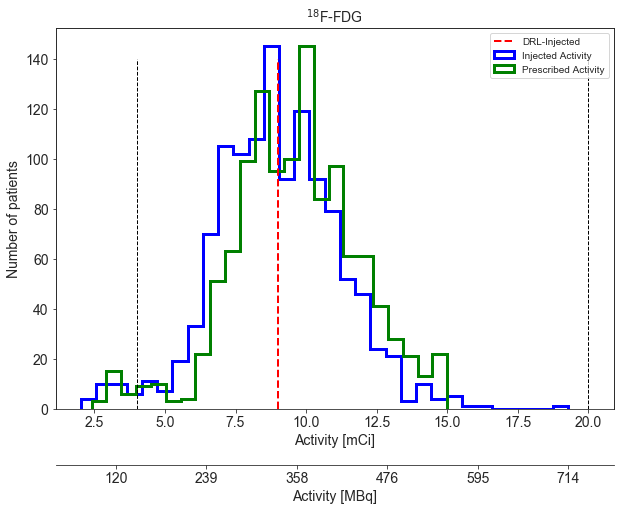

In [297]:
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data['Actiny'],norm_hist=False,kde=False,ax=ax1,label='Injected Activity',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "b"})
sns.distplot(data['Actipres'],norm_hist=False,kde=False,ax=ax1, label='Prescribed Activity',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "g"})

################################ 
#########  FDG  ################
plt.plot((20, 20),(0,140), '--k', linewidth=1) 
plt.plot((4, 4),(0,140), '--k', linewidth=1) 
plt.plot((9.0, 9.0),(0,140), '--r', linewidth=2,label='DRL-Injected')


################################ 
#########  GAPSMA  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
#plt.plot((4.46, 4.46),(0,60), '--r', linewidth=2,label='DRL-Injected')

################################ 
#########  GADOTANOC  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
#plt.plot((3.88, 3.88),(0,45), '--r', linewidth=2,label='DRL-Injected')


ax1.set_title('$^{18}$F-FDG',fontsize=14)
#ax1.set_title('$^{68}$Ga-PSMA',fontsize=14)
#ax1.set_title('$^{68}$Ga-DOTA',fontsize=14)
ax1.set_ylabel('Number of patients',fontsize=14)
ax1.set_xlabel('Activity [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
ax1.legend(loc='upper right')
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data['Actiny'].min(),data['Actiny'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Activity [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)


plt.savefig('fdgdrl.pdf',bbox_inches = "tight")

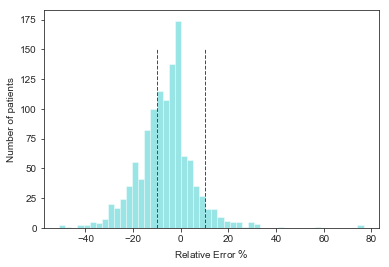

In [299]:
sns.distplot(data['desviasigno'],norm_hist=False,kde=False,color='c',label='Actividad Inyectada')
plt.plot((10, 10),(0,150), '--r', linewidth=1) 
plt.plot((-10, -10),(0,150), '--r', linewidth=1) 
plt.xlabel('Relative Error $\%$')
plt.ylabel('Number of patients')
plt.savefig('errorrelfdgAPI.pdf',bbox_inches = "tight")

HASTA AQUIIIIIII

In [75]:
#h=pd.to_datetime(data["Fecha"],format="%d/%m/%Y")
plt.plot(h,data['desviasigno'],'bo-')

NameError: name 'h' is not defined

In [54]:
# simply drop whole row with NaN in "Vol" column
data.dropna(subset=["Voldosi"], axis=0, inplace=True)

# reset index, because we droped one row
data.reset_index(drop=True, inplace=True)

In [56]:
data[["Voldosi"]] = data[["Voldosi"]].astype("float")

In [57]:
especifica=data["Actiny"]/data["Voldosi"]
data['Espiny']= especifica

In [58]:
data.describe()

,Actipres,Actidosi,Voldosi,Actiny,desviasigno,desvia,Espiny
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,9.612517,23.943217,1.805546,8.963976,-6.244628,9.972400,5.410944
std,2.239064,13.960397,0.584042,2.197402,11.842782,8.930089,2.172504
min,2.400000,1.400000,0.500000,2.020000,-51.041667,0.000000,0.545455
25%,8.300000,14.200000,1.500000,7.500000,-12.776511,3.333333,4.000000
50%,9.600000,20.150000,2.000000,8.975000,-6.006159,7.974359,5.000000
75%,11.100000,30.225000,2.000000,10.442500,0.000000,14.271429,6.400000
max,15.000000,99.100000,11.000000,19.300000,76.666667,76.666667,22.300000


/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KeyError: 'Esp'

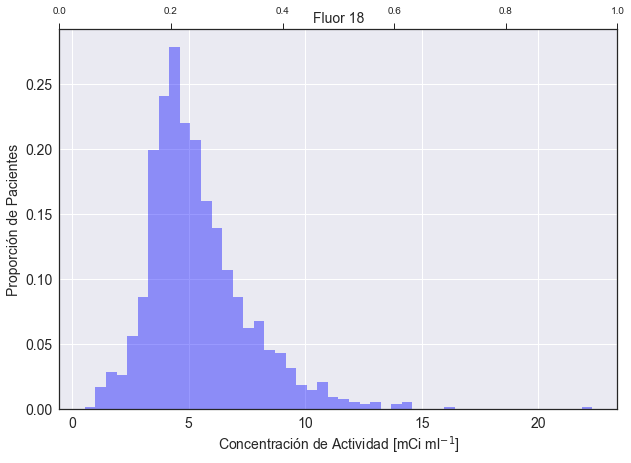

In [59]:
#sns.distplot(data_Gapsma['Esp'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
#sns.distplot(data['Esp'],norm_hist=True,kde=False,color='g',ax=ax1)
#sns.distplot(data['Esppres'],norm_hist=True,kde=False,color='b',ax=ax1)
sns.distplot(data['Espiny'],norm_hist=True,kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('Fluor 18',fontsize=14)
ax1.set_ylabel('Proporción de Pacientes',fontsize=14)
ax1.set_xlabel('Concentración de Actividad [mCi ml$^{-1}$]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data['Esp'].min(),data['Esp'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Concentración de Actividad  [MBq ml$^{-1}$]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)
plt.savefig('FDGcon.pdf',bbox_inches = "tight")

### Diagnostic Reference Level 

Comparar con guías internacionales: Europea (SNMMI) y no se que otra. Los valores de actividad a administrar por RF de diagnostico en PET.

In [60]:
##########  Agrupando por examen #########
#data_group_exam = data.groupby(['Radiofarmaco'],as_index=False)

######### FDG ##########
#FDG= data_group_exam.get_group('FDG')

######### GADOTA  ##########
#GADOTA= data_group_exam.get_group('GADOTA')

######### GAPSMA  ##########
#GAPSMA= data_group_exam.get_group('GADOTA')

In [61]:
data.dropna(subset=["Actiny"], axis=0, inplace=True)
data.dropna(subset=["Actiny"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [62]:
data['Actiny'].describe()

count    1172.000000
mean        8.963976
std         2.197402
min         2.020000
25%         7.500000
50%         8.975000
75%        10.442500
max        19.300000
Name: Actiny, dtype: float64

In [63]:
import seaborn as sns

In [65]:
######## Estadisticos FDG F-18
#FDG['ActivIny'].describe()
data[['Actiny','Actipres']].describe()

,Actiny,Actipres
count,1172.000000,1172.000000
mean,8.963976,9.612517
std,2.197402,2.239064
min,2.020000,2.400000
25%,7.500000,8.300000
50%,8.975000,9.600000
75%,10.442500,11.100000
max,19.300000,15.000000


In [102]:
data['desviasigno'].describe()

count    148.000000
mean      -3.176383
std       27.017272
min      -56.410256
25%      -19.852941
50%       -2.086957
75%       13.095109
max       89.000000
Name: desviasigno, dtype: float64

In [86]:
######## Estadisticos GADOTA Ga-68
#GADOTA['ActivIny'].describe()

In [87]:
######## Estadisticos GAPSMA Ga-68
#GAPSMA['ActivIny'].describe()

In [88]:
#data.dtypes

In [89]:
#replace NV to NaN
#data.replace("NV", np.nan, inplace = True)

In [90]:
#data.dtypes

In [91]:
#data[["ActivAdm"]] = data[["ActivAdm"]].astype("float")

In [92]:
#data.dropna(subset=["ActivAdm"], axis=0, inplace=True)

In [93]:
#data.reset_index(drop=True, inplace=True)

\begin{equation}
\%=\frac{(\text{Actividad Prescrita}-\text{Actividad Inyectada})\times 100}{\text{Actividad Prescrita}}
\end{equation}

Aquí Actividad Inyectada = Actividad Pre-jeringa -Actividad Post Jeringa

In [94]:
##Diferencia
#perce=np.absolute(((data['ActivAdm']-data['ActivIny'])*100)/data['ActivAdm'])

In [95]:
#percent=round(perce,1)

In [96]:
### Ingresar datos en el data 
#data['percent']= percent

In [97]:
data.head()

,Genero,Peso,Horarec,Actipres,Horadm,Actidosi,Horadosi,Voldosi,Actiny,Horainy,Operador,desviasigno,desvia
0,F,90,7:38,13.5,8:00,16.7,7:21,1.5,10.87,8:20,Andrea,-19.481481,19.481481
1,M,74,7:38,11.1,8:30,17.5,7:30,2.6,10.11,8:50,Andrea,-8.918919,8.918919
2,M,55,9:00,8.3,9:00,13.8,7:38,2,7.24,11:08,Andrea,-12.771084,12.771084
3,F,62,10:00,9.3,9:30,15.8,8:15,2,7.97,9:51,Andrea,-14.301075,14.301075
4,F,60,10:00,9.0,10:30,21.0,8:26,2,6.54,10:39,Andrea,-27.333333,27.333333


Altos porcentajes de diferencia entre actividad prescrita y actividad inyectada, pueden tener las siguientes causas asignables:

1. Retraso en la recepción de la actividad porque: radiofarmaco esta en pruebas de control de calidad ó falla  comunicación entre RF-MN  [TIEMPO]
2. El farmaco marcado con Ga-68 es enviado en una lonchera y con un tapón. En el cambio del tapón por la jeringa, es probable que se pierda una cierta cantidad de material (y tiempo)
3. Dificultades tecnicas con el PET, que retrasa el proceso para realizar el estudio [TIEMPO]
4. ¿Actividad residual en jeringa es considerable?
5. Daño en el ascensor

#### Añadir grafico % Dif 

In [98]:
##########  Agrupando por examen #########
#data_group_exam = data.groupby(['Radiofarmaco'],as_index=False)

######### FDG ##########
#FDG= data_group_exam.get_group('FDG')

######### GADOTA  ##########
#GADOTA= data_group_exam.get_group('GADOTA')

In [99]:
#FDG['percent'].describe()

In [171]:
#subgroup

In [173]:
#subgroup.loc[subgroup['timePR'].dt.days<0]= np.nan

In [174]:

#subgroup

#subgroup["suma"].dt.seconds

In [615]:
#subgroup

In [616]:
#tiempointer=subgroup['timePR'].dt.seconds
#microseconds.values
#tiempointer[3]*(-1)

In [613]:
#tiempointer/60

In [25]:
#### Tiempo transcurrido entre la hora de inyección y la hora prescrita 
timePI = Inye -pres

In [614]:
#timePI

In [29]:
#### Tiempo transcurrido entre la hora de dosificación y la hora de inyección
timeID = Inye -dosi